# CO395 Coursework 1: Decision Tree

Note: This is functional programming version of Decision Tree classifier for CO395 coursework 1.

## Build the Tree 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
#import tensorflow as tf

In [2]:
np.random.seed(42)
# Load the clean dataset
path= 'wifi_db/clean_dataset.txt'
data = np.loadtxt(path)
train_idx = np.random.choice(2000, 1800, replace = False)
test_idx = np.delete(np.arange(data.shape[0]), train_idx)
train_set = data[train_idx, :]
test_set = data[test_idx, :]

In [3]:
# Load the noisy dataset
path_noisy = 'wifi_db/noisy_dataset.txt'
data_noisy = np.loadtxt(path_noisy)
np.random.seed(42)
train_idx_noisy = np.random.choice(2000, 1800, replace = False)
test_idx_noisy = np.delete(np.arange(data_noisy.shape[0]), train_idx_noisy)
train_set_noisy = data_noisy[train_idx_noisy, :]
test_set_noisy = data_noisy[test_idx_noisy, :]

In [4]:
# fixed bug
def decision_tree_learning(train_set, max_depth, depth=0):
    max_depth = max_depth
    
    if depth >= max_depth:
        labels, counts = np.unique(train_set[:, -1], return_counts=True)
        return labels[np.argmax(counts)], depth
        
    if len(np.unique(train_set[:, -1])) == 1:
        return train_set[0][-1], depth
    
    else:
        attribute, value = find_split(train_set)
        l_data = train_set[train_set[:,attribute] <= value, :]
        r_data = train_set[train_set[:,attribute] > value, :]
        if len(l_data) == 0 or len(r_data) == 0:
            labels, counts = np.unique(np.concatenate((l_data, r_data), axis=0)[:, -1], return_counts=True)
            return labels[np.argmax(counts)], depth
        
        l_branch, l_depth= decision_tree_learning(l_data, max_depth, depth = depth + 1)
        r_branch, r_depth= decision_tree_learning(r_data, max_depth, depth = depth + 1)
        node = {'attribute':attribute,'value':value,'left':l_branch,'right':r_branch} 
        
        return node, max(l_depth, r_depth)

In [5]:
def find_split(train_set):
    labels = train_set[:,-1]
    num_sample = train_set.shape[0]
    num_attribute = train_set.shape[1] - 1
    prev_gain = 0
    split_value = 0
    attribute = 0
    for var_idx in range(num_attribute):
        x_col = train_set[:,var_idx]
        sort_idx = np.argsort(x_col)
        sort_labels, sort_x = labels[sort_idx], x_col[sort_idx]
        curr_label=sort_labels[0]
        for i in range(1,num_sample):
            #only calculate information gain when there is a label change
            if sort_labels[i]!=curr_label:
                curr_label=sort_labels[i]
                s_left = sort_labels[:i]
                s_right = sort_labels[i:]
                curr_gain = infomation_gain(sort_labels, s_left, s_right)
                if curr_gain > prev_gain:
                    prev_gain = curr_gain
                    split_value = (sort_x[i] + sort_x[i-1]) /2
                    attribute = var_idx
    return attribute, split_value

In [6]:
def entropy(label):
     # Count number of label and frequency
    unique, counts = np.unique(label, return_counts=True)
    dist = counts / sum(counts)
    H = -sum(dist * np.log2(dist))
    return H

In [7]:
def infomation_gain(S_all, S_left, S_right):
    remainder = len(S_left)/(len(S_left)+len(S_right)) * entropy(S_left) + len(S_right)/(len(S_left)+len(S_right)) * entropy(S_right)
    gain = entropy(S_all) - remainder
    return gain

In [8]:
def predict(inTree, x_new):
    if x_new[inTree['attribute']] <= inTree['value']:
        if isinstance(inTree['left'], dict):
            return predict(inTree['left'], x_new)
        else:
            return inTree['left']
    else:
        if isinstance(inTree['right'], dict):
            return predict(inTree['right'], x_new)
        else:
            return inTree['right']

In [9]:
def get_prediction(inTree, test_set):
    predictions = np.array([])
    for xi in test_set:
        prediction = predict(inTree,xi)
        predictions = np.append(predictions,[prediction])
    return predictions

In [10]:
def accuracy(inTree, test_set):
    if len(test_set)==0:
        return 0
    else:
        prediction = get_prediction(inTree,test_set)
        test_label = test_set[:,-1]
        return sum(test_label == prediction)/len(test_label)

In [11]:
for depth in range(1, 16):
    tree = decision_tree_learning(train_set, depth)
    print('max_depth:', depth, 'accuracy:', accuracy(tree[0], test_set))

max_depth: 1 accuracy: 0.48
max_depth: 2 accuracy: 0.925
max_depth: 3 accuracy: 0.935
max_depth: 4 accuracy: 0.96
max_depth: 5 accuracy: 0.965
max_depth: 6 accuracy: 0.965
max_depth: 7 accuracy: 0.97
max_depth: 8 accuracy: 0.965
max_depth: 9 accuracy: 0.97
max_depth: 10 accuracy: 0.97
max_depth: 11 accuracy: 0.97
max_depth: 12 accuracy: 0.97
max_depth: 13 accuracy: 0.97
max_depth: 14 accuracy: 0.97
max_depth: 15 accuracy: 0.97


In [12]:
print(tree)

({'attribute': 0, 'value': -54.0, 'left': {'attribute': 4, 'value': -59.0, 'left': {'attribute': 3, 'value': -56.0, 'left': {'attribute': 2, 'value': -51.0, 'left': {'attribute': 4, 'value': -61.0, 'left': 1.0, 'right': {'attribute': 0, 'value': -62.5, 'left': {'attribute': 0, 'value': -64.5, 'left': 4.0, 'right': 3.0}, 'right': 1.0}}, 'right': 4.0}, 'right': {'attribute': 1, 'value': -50.5, 'left': 3.0, 'right': {'attribute': 0, 'value': -59.0, 'left': 3.0, 'right': 1.0}}}, 'right': {'attribute': 4, 'value': -56.5, 'left': {'attribute': 3, 'value': -58.5, 'left': 4.0, 'right': 3.0}, 'right': 4.0}}, 'right': {'attribute': 0, 'value': -44.0, 'left': {'attribute': 3, 'value': -48.0, 'left': {'attribute': 4, 'value': -67.0, 'left': {'attribute': 0, 'value': -46.5, 'left': {'attribute': 4, 'value': -73.0, 'left': {'attribute': 0, 'value': -51.0, 'left': 3.0, 'right': 2.0}, 'right': {'attribute': 5, 'value': -77.0, 'left': 3.0, 'right': 3.0}}, 'right': {'attribute': 1, 'value': -53.5, 'left

## Tree Visualization

The following code is adapted from resources online. The location of leaf and node need to be determined by better method.

In [13]:
# Define the property of Node and Leaf
decisionNode=dict(boxstyle="square",fc="w")
leafNode=dict(boxstyle="circle",fc="w")
arrow_args=dict(arrowstyle="<-", shrinkA = 0,shrinkB=25)

In [14]:
# Define the function in plotting node and leaf
def plotNode(nodeText,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeText,xy=parentPt,xycoords='axes fraction',xytext=centerPt,textcoords='axes fraction',
                           va='center',ha='center',size=10,bbox=nodeType,arrowprops=arrow_args)

In [15]:
# Find number of leaves in the tree
def getNumLeafs(myTree):
    numLeafs =0
    # Check if the left or right branch contain a tree
    for key in ['left','right']:
        if type(myTree[key]).__name__=='dict':
            numLeafs+=getNumLeafs(myTree[key])
        else: numLeafs+=1
    return numLeafs

In [16]:
# Find the depth of the tree
def getTreeDepth(myTree):
    maxDepth=0
    for key in ['left','right']:
        if type(myTree[key]).__name__=='dict':
            thisDepth=1+getTreeDepth(myTree[key])
        else: thisDepth=1
        if thisDepth>maxDepth:
            maxDepth=thisDepth
    return maxDepth


In [17]:
# define the main functions, plotTree
def plotTree(myTree, parentPt):
    numLeafs = getNumLeafs(myTree)   #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    nodeStr='X' + str(myTree['attribute'])  + ' < ' + str(myTree['value'])  #the text label for this node should be this
    cntrPt = (plotTree.xOff +5/plotTree.totalW, plotTree.yOff)      # location of the node
    plotNode(nodeStr, cntrPt, parentPt, decisionNode)       # plot the node
    plotTree.yOff = plotTree.yOff - 1.5/plotTree.totalD   # Move to next level to change yoff
    for key in ['left','right']:
        if type(myTree[key]).__name__=='dict':     #test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(myTree[key],cntrPt)        #recursion
        else:                                             #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 5/plotTree.totalW
            leafStr = 'Leaf:' + str(myTree[key])
            plotNode(leafStr, (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
    plotTree.yOff = plotTree.yOff + 1.5/plotTree.totalD


In [18]:
# create the plot of decision tree
def createPlot(Tree):
    fig=plt.figure(1,figsize=(7,7),facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(frameon=False,**axprops)
    plotTree.totalW=float(getNumLeafs(Tree))
    plotTree.totalD=float(getTreeDepth(Tree))
    plotTree.xOff=1/plotTree.totalW
    plotTree.yOff=3
    # Initialize the root location
    init_loc = cntrPt = (plotTree.xOff +5/plotTree.totalW, plotTree.yOff)
    plotTree(Tree, init_loc)
    plt.show()


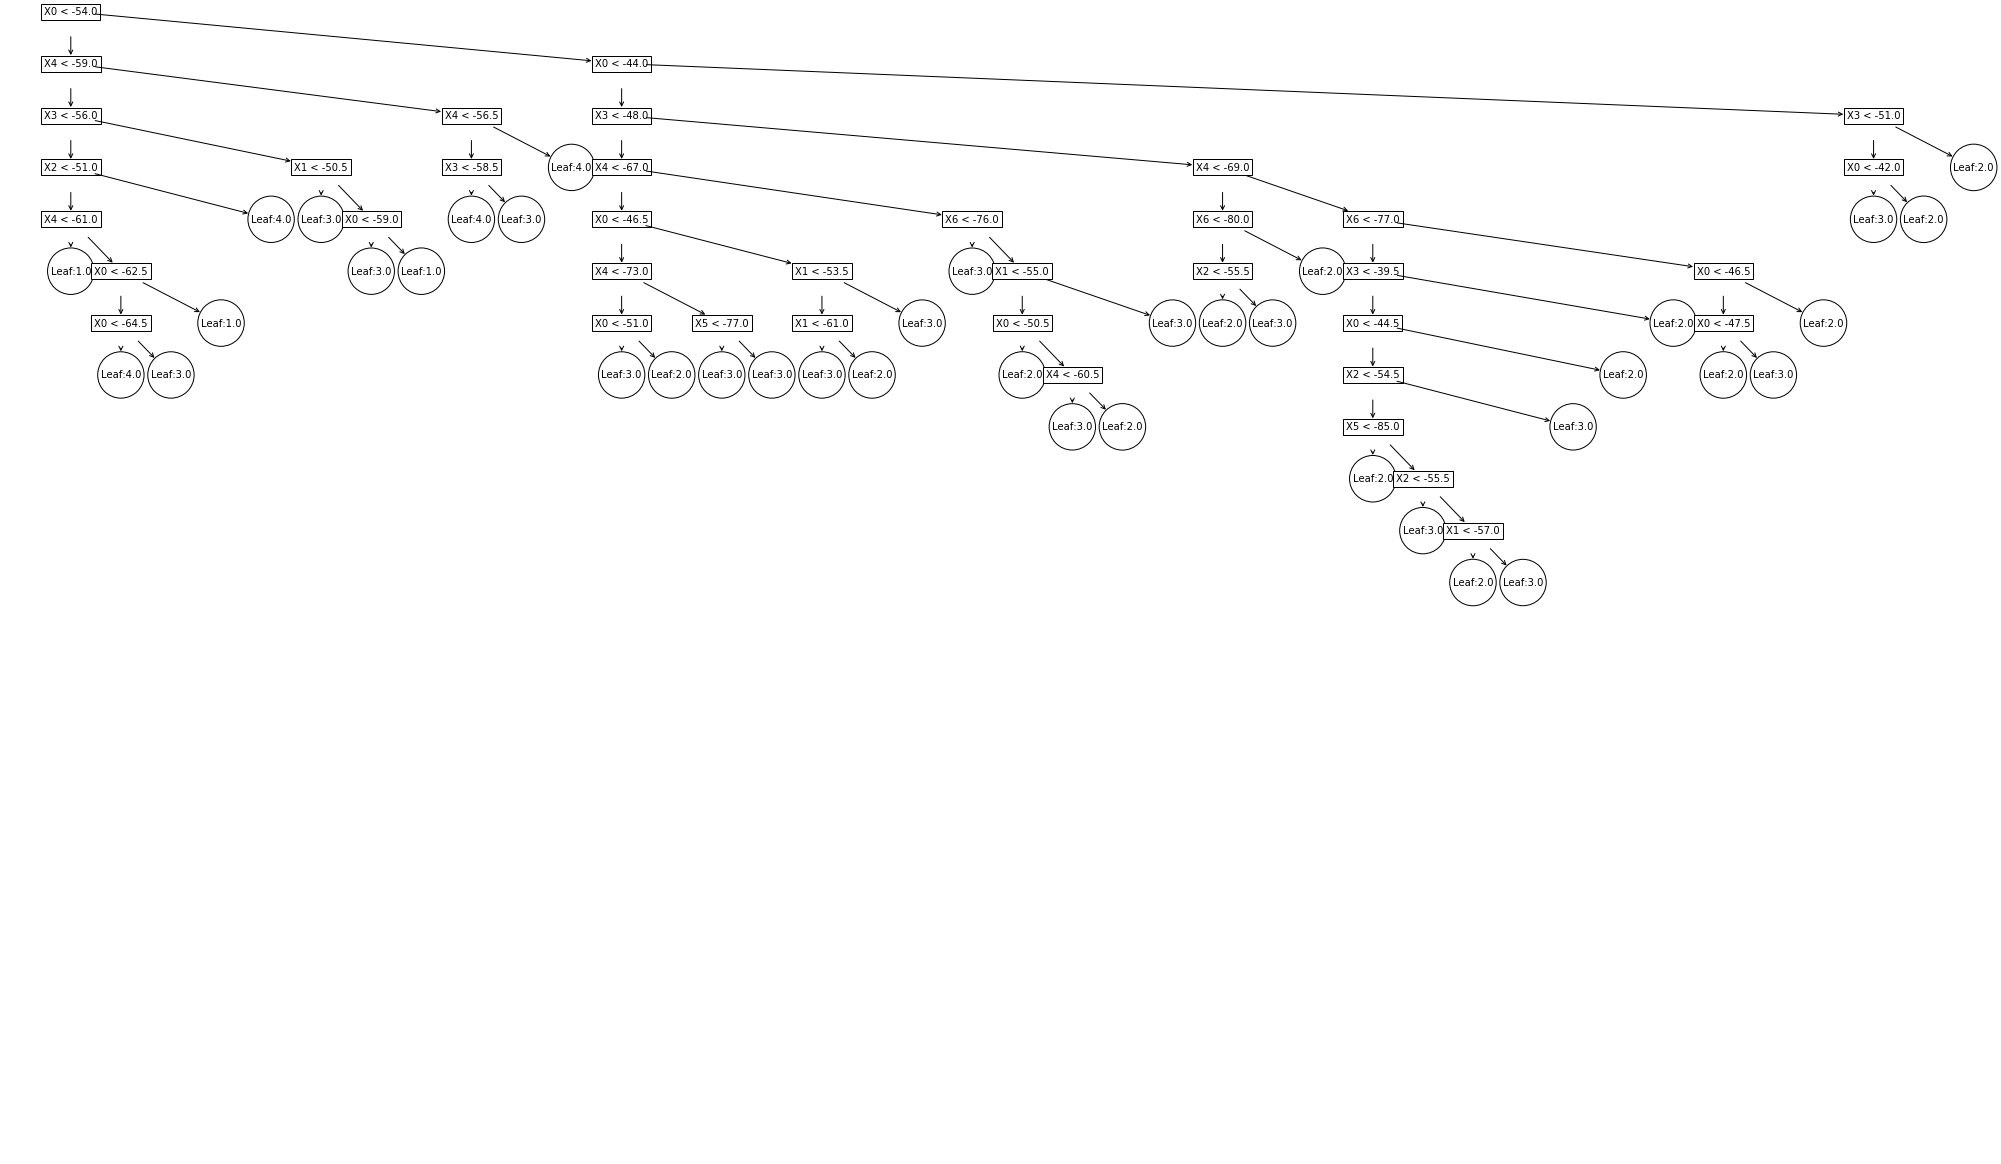

In [19]:
createPlot(tree[0])

## Evaluation

In [20]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    fold_size = dataset.shape[0] / n_folds
    idx = np.random.permutation(dataset.shape[0])
    fold_idx = np.split(idx, n_folds)
    return fold_idx

In [21]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, n_folds):
    fold_idx = cross_validation_split(dataset, n_folds)
    scores = []
    i = 0
    acc = 0
    n_label = len(np.unique(dataset[:,-1]))
    cm = np.zeros((n_label,n_label))
    for valid_idx in fold_idx:
        i += 1
        print('processing fold',i)
        valid_set = dataset[valid_idx,:]
        train_idx = np.delete(np.arange(dataset.shape[0]), valid_idx)
        train_set = dataset[train_idx,:]
        tree = decision_tree_learning(train_set,10)
        actual = valid_set[:,-1]
        prediction = get_prediction(tree[0], valid_set)
        cm += confusion_matrix(actual, prediction)
        acc += accuracy(tree[0],valid_set)
    acc /= n_folds
    cm /= n_folds
    return acc, cm

In [194]:
n_folds = 10
# measure accuracy for clean data
acc, cm = evaluate_algorithm(data,n_folds)
print('cross validation accuracy for clean data is', acc)
print('average confusion matrix for clean data is \n', cm)

processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 5
processing fold 6
processing fold 7
processing fold 8
processing fold 9
processing fold 10
cross validation accuracy for clean data is 0.9750000000000002
average confusion matrix for clean data is 
 [[49.5  0.   0.3  0.2]
 [ 0.  47.6  2.4  0. ]
 [ 0.1  1.1 48.5  0.3]
 [ 0.3  0.   0.3 49.4]]


In [173]:
# score for noisy data
acc_noisy, cm_noisy = evaluate_algorithm(data_noisy ,n_folds)
print('cross validation accuracy for noisy data is', acc_noisy)
print('average confusion matrix for noisy data is \n', cm_noisy)

processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 5
processing fold 6
processing fold 7
processing fold 8
processing fold 9
processing fold 10
cross validation accuracy for clean data is 0.857
average confusion matrix for clean data is 
 [[43.5  1.5  1.7  2.3]
 [ 2.8 42.3  3.1  1.5]
 [ 2.5  3.7 42.9  2.4]
 [ 2.9  1.8  2.4 42.7]]


## Confusion Matrix

The following code is adapted from the Computer Vision coursework but remove the dependency on other package.

In [22]:
def confusion_matrix(actual, prediction):
    '''
    Take y_label and f_predicted array, return a 2D array of confusion matrix
    '''
    labels = np.unique(actual)
    cm = np.zeros((len(labels), len(labels)),dtype=np.int32)
    for a, p in zip(actual.astype(int), prediction.astype(int)):
        cm[a-1][p-1] += 1

    return cm

In [23]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    '''
    Plot the confusion matrix
    '''
    print(title)
    print(cm)
    classes = np.unique(actual).astype(int)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '2'
    thresh = cm.max() / 2.

    for i, j in ((i,j) for i in range(cm.shape[0]) for j in range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [24]:
def recalls(cm):
    recalls = []
    size = len(cm)
    for i in range(size):
        total = cm[i,:]
        recall = cm[i][i]/sum(total)
        recalls.append(recall)

    return recalls

In [25]:
def precisions(cm):
    precisions = []
    size = len(cm)
    for i in range(size):
        pred_total = cm[:,i]
        precision = cm[i][i]/sum(pred_total)
        precisions.append(precision)
    return precisions

In [26]:
def F1Measure(recalls, precisions):
    F1_score = []
    for recall, precision in zip(recalls, precisions):
        F1_score.append(2*(precision*recall)/(precision+recall))
    return F1_score

In [27]:
def classification_rate(cm):
    return sum(np.diag(cm)) / sum(cm)

In [28]:
n_folds = 10
# measure accuracy for clean data
acc, cm = evaluate_algorithm(data,n_folds)
print('cross validation accuracy for clean data is', acc)
print('average confusion matrix for clean data is \n', cm)

processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 5
processing fold 6
processing fold 7
processing fold 8
processing fold 9
processing fold 10
cross validation accuracy for clean data is 0.9764999999999999
average confusion matrix for clean data is 
 [[49.5  0.   0.1  0.4]
 [ 0.  48.1  1.9  0. ]
 [ 0.2  1.  48.5  0.3]
 [ 0.4  0.   0.4 49.2]]


In [29]:
# score for noisy data
acc_noisy, cm_noisy = evaluate_algorithm(data_noisy ,n_folds)
print('cross validation accuracy for clean data is', acc_noisy)
print('average confusion matrix for clean data is \n', cm_noisy)

processing fold 1
processing fold 2
processing fold 3
processing fold 4
processing fold 5
processing fold 6
processing fold 7
processing fold 8
processing fold 9
processing fold 10
cross validation accuracy for clean data is 0.8745
average confusion matrix for clean data is 
 [[43.8  1.2  1.8  2.2]
 [ 2.6 43.3  2.4  1.4]
 [ 2.3  3.  44.2  2. ]
 [ 2.8  1.5  1.9 43.6]]


In [30]:
# plot clean data confusion matrix
# plot_confusion_matrix(cm)

In [31]:
# plot clean data confusion matrix
# plot_confusion_matrix(cm_noisy)

In [32]:
# print other evaluation metrics for clean data
print("recalls per class:")
print(recalls(cm))
print("precisions rates per class:")
print(precisions(cm))
print("classification rate:",classification_rate(cm))

recalls per class:
[0.99, 0.9620000000000001, 0.97, 0.9840000000000001]
precisions rates per class:
[0.9880239520958084, 0.9796334012219959, 0.9528487229862476, 0.9859719438877755]
classification rate: [3.89820359 3.97759674 3.83693517 3.91382766]


In [33]:
# print other evaluation metrics for noisy data
print("recalls per class:")
print(recalls(cm_noisy))
print("precisions rates per class:")
print(precisions(cm_noisy))
print("classification rate:",classification_rate(cm_noisy))

recalls per class:
[0.8938775510204081, 0.8712273641851107, 0.858252427184466, 0.8755020080321286]
precisions rates per class:
[0.850485436893204, 0.883673469387755, 0.878727634194831, 0.8861788617886178]
classification rate: [3.3961165  3.56938776 3.47713718 3.55487805]


## Tree Pruning

In [34]:
def prune(inTree,train_set,valid_set):
    '''
    Idea of algorithm: 
    Construct a prune_tree by copying the trained tree node by node, 
    for those node that can be pruned, replace the dictionary by a leaf value. 
    Assign the train_set and valid set sample to its corresponding node and only 
    evaluate if accuracy improved on the sub-valid on the prune node.
    If the pruned result is better, replace the node by leaf and determine its value 
    by majority vote on the sub-train set.
    '''
    if len(train_set) == 0:
        return None
    if not inTree['left']:
        return inTree['right']
    if not inTree['right']:
        return inTree['left']
    # Terminal conditon: Only when left and right key is value(float)
    if isinstance(inTree['left'],float) and isinstance(inTree['right'],float):
        bef_acc =accuracy(inTree,valid_set)
        # Majority vote
        unique, counts  = np.unique(train_set[:,-1], return_counts=True)
        aft_label = unique[np.argmax(counts)]
        if len(valid_set) == 0:
            aft_acc = 0
        else:
            aft_acc = np.sum(valid_set[:,-1] == aft_label) / valid_set.shape[0]
        # Check if validation error reduce
        if aft_acc > bef_acc:
            return aft_label
        else:
        # If not reduce, the branch is not pruned
            tmp_tree = {}
            tmp_tree['attribute'] = inTree['attribute']
            tmp_tree['value'] = inTree['value']
            tmp_tree['left'] = inTree['left']
            tmp_tree['right'] = inTree['right']
            return tmp_tree
    else:
        # divide subset by recursion
        a = train_set[:,inTree['attribute']] < inTree['value']
        b = valid_set[:,inTree['attribute']] < inTree['value']
        left_subset_train=train_set[a,:]
        left_subset_valid=valid_set[b,:]
        right_subset_train = train_set[np.logical_not(a),:]
        right_subset_valid = valid_set[np.logical_not(b),:]
       # Tree copy by recursion
        tmp_tree = {}
        tmp_tree['attribute'] = inTree['attribute']
        tmp_tree['value'] = inTree['value']


        tmp_tree['left']=None
        tmp_tree['right']=None
        # Three other possible cases with different copy rule
        if isinstance(inTree['left'],dict) and isinstance(inTree['right'],float):
            left = prune(inTree['left'],left_subset_train,left_subset_valid)
            tmp_tree['left'] = left
            tmp_tree['right'] = inTree['right']

        elif isinstance(inTree['right'],dict) and isinstance(inTree['left'],float):
            right = prune(inTree['right'],right_subset_train,right_subset_valid)
            tmp_tree['left'] = inTree['left']
            tmp_tree['right'] = right
        elif isinstance(inTree['right'],dict) and isinstance(inTree['left'],dict):
            left = prune(inTree['left'],left_subset_train,left_subset_valid)
            right = prune(inTree['right'],right_subset_train,right_subset_valid)
            tmp_tree['left'] = left
            tmp_tree['right'] = right
    return tmp_tree

In [35]:
tree =decision_tree_learning(train_set,3)[0]
tmp_tree = prune(tree,train_set,test_set)

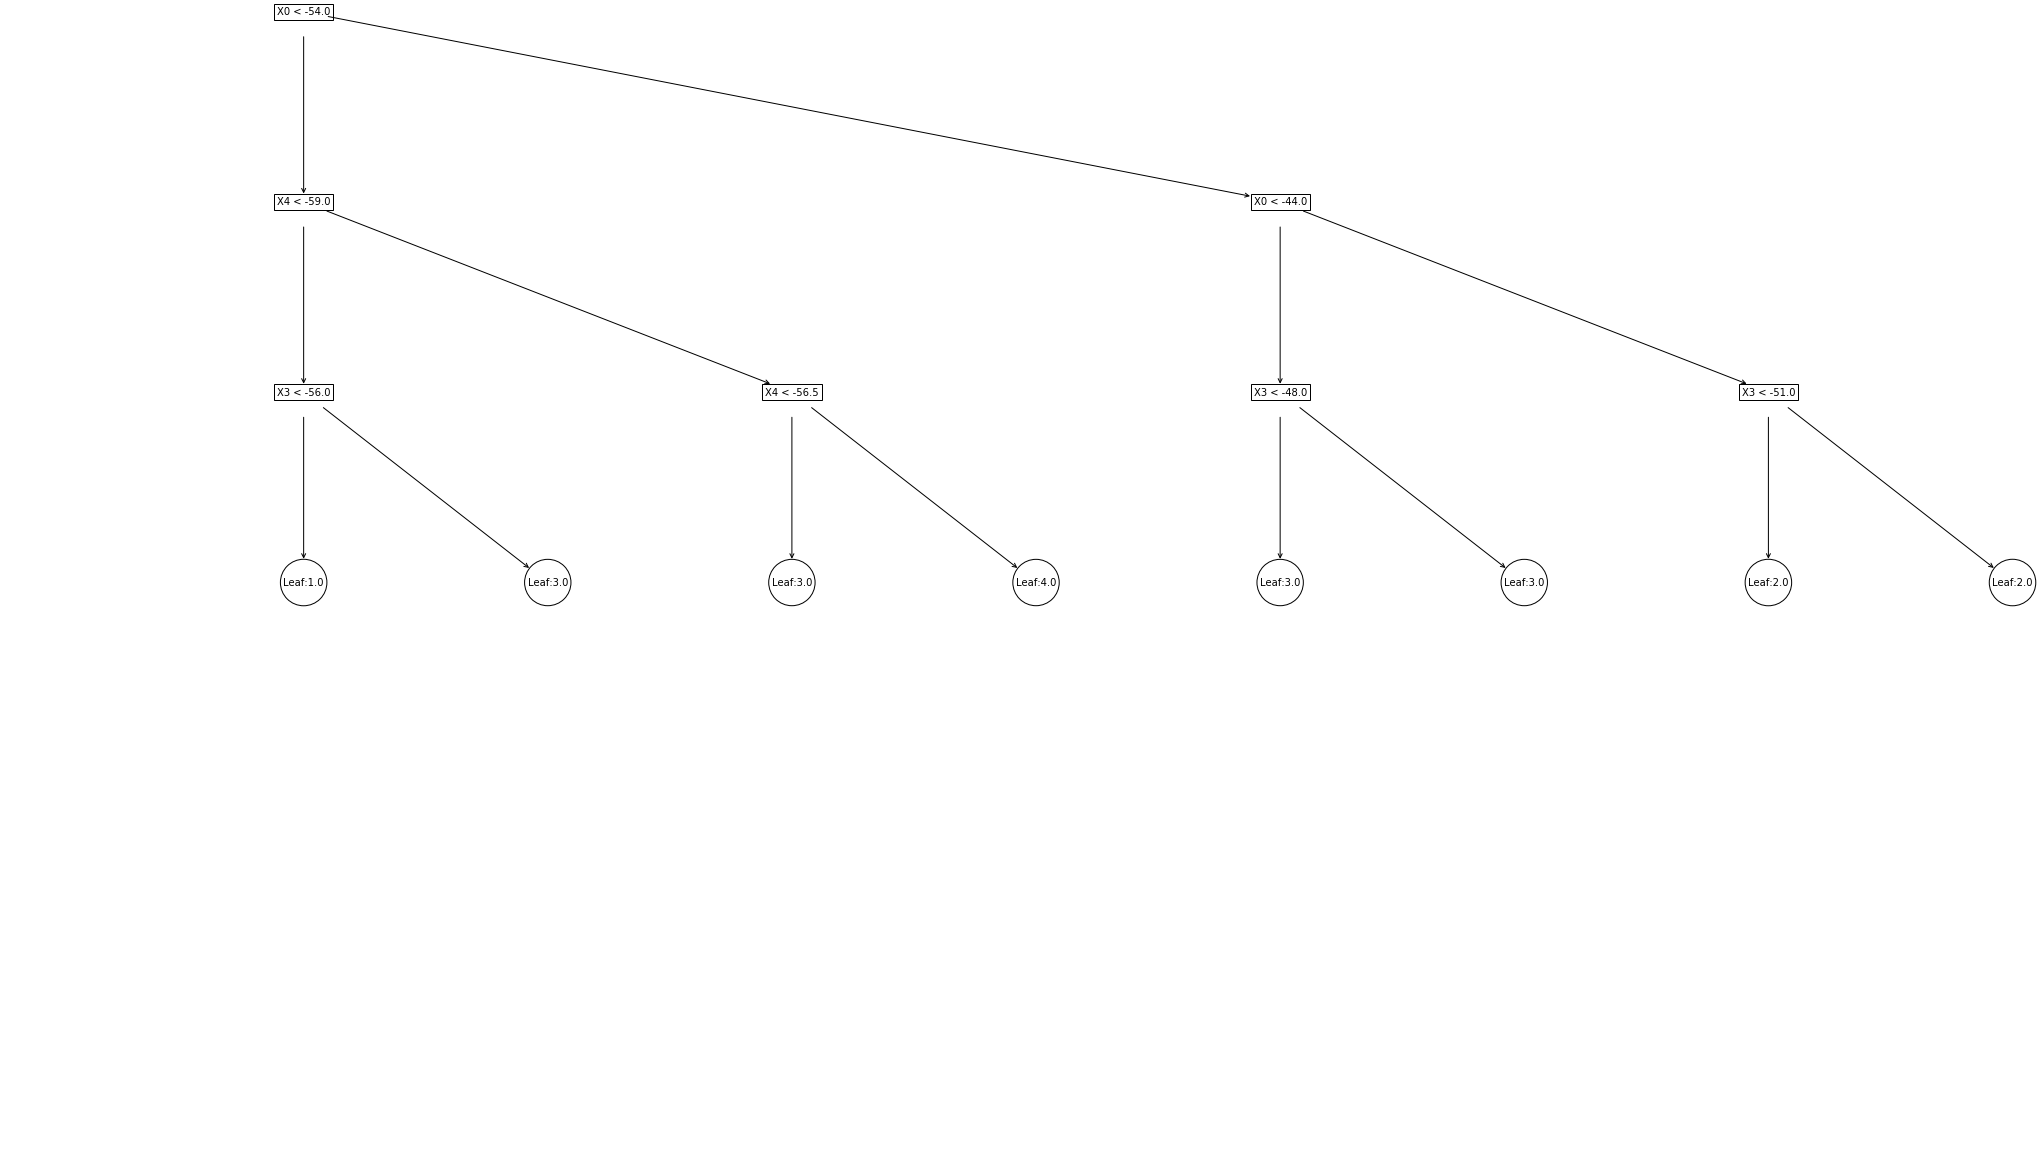

In [36]:
createPlot(tree)

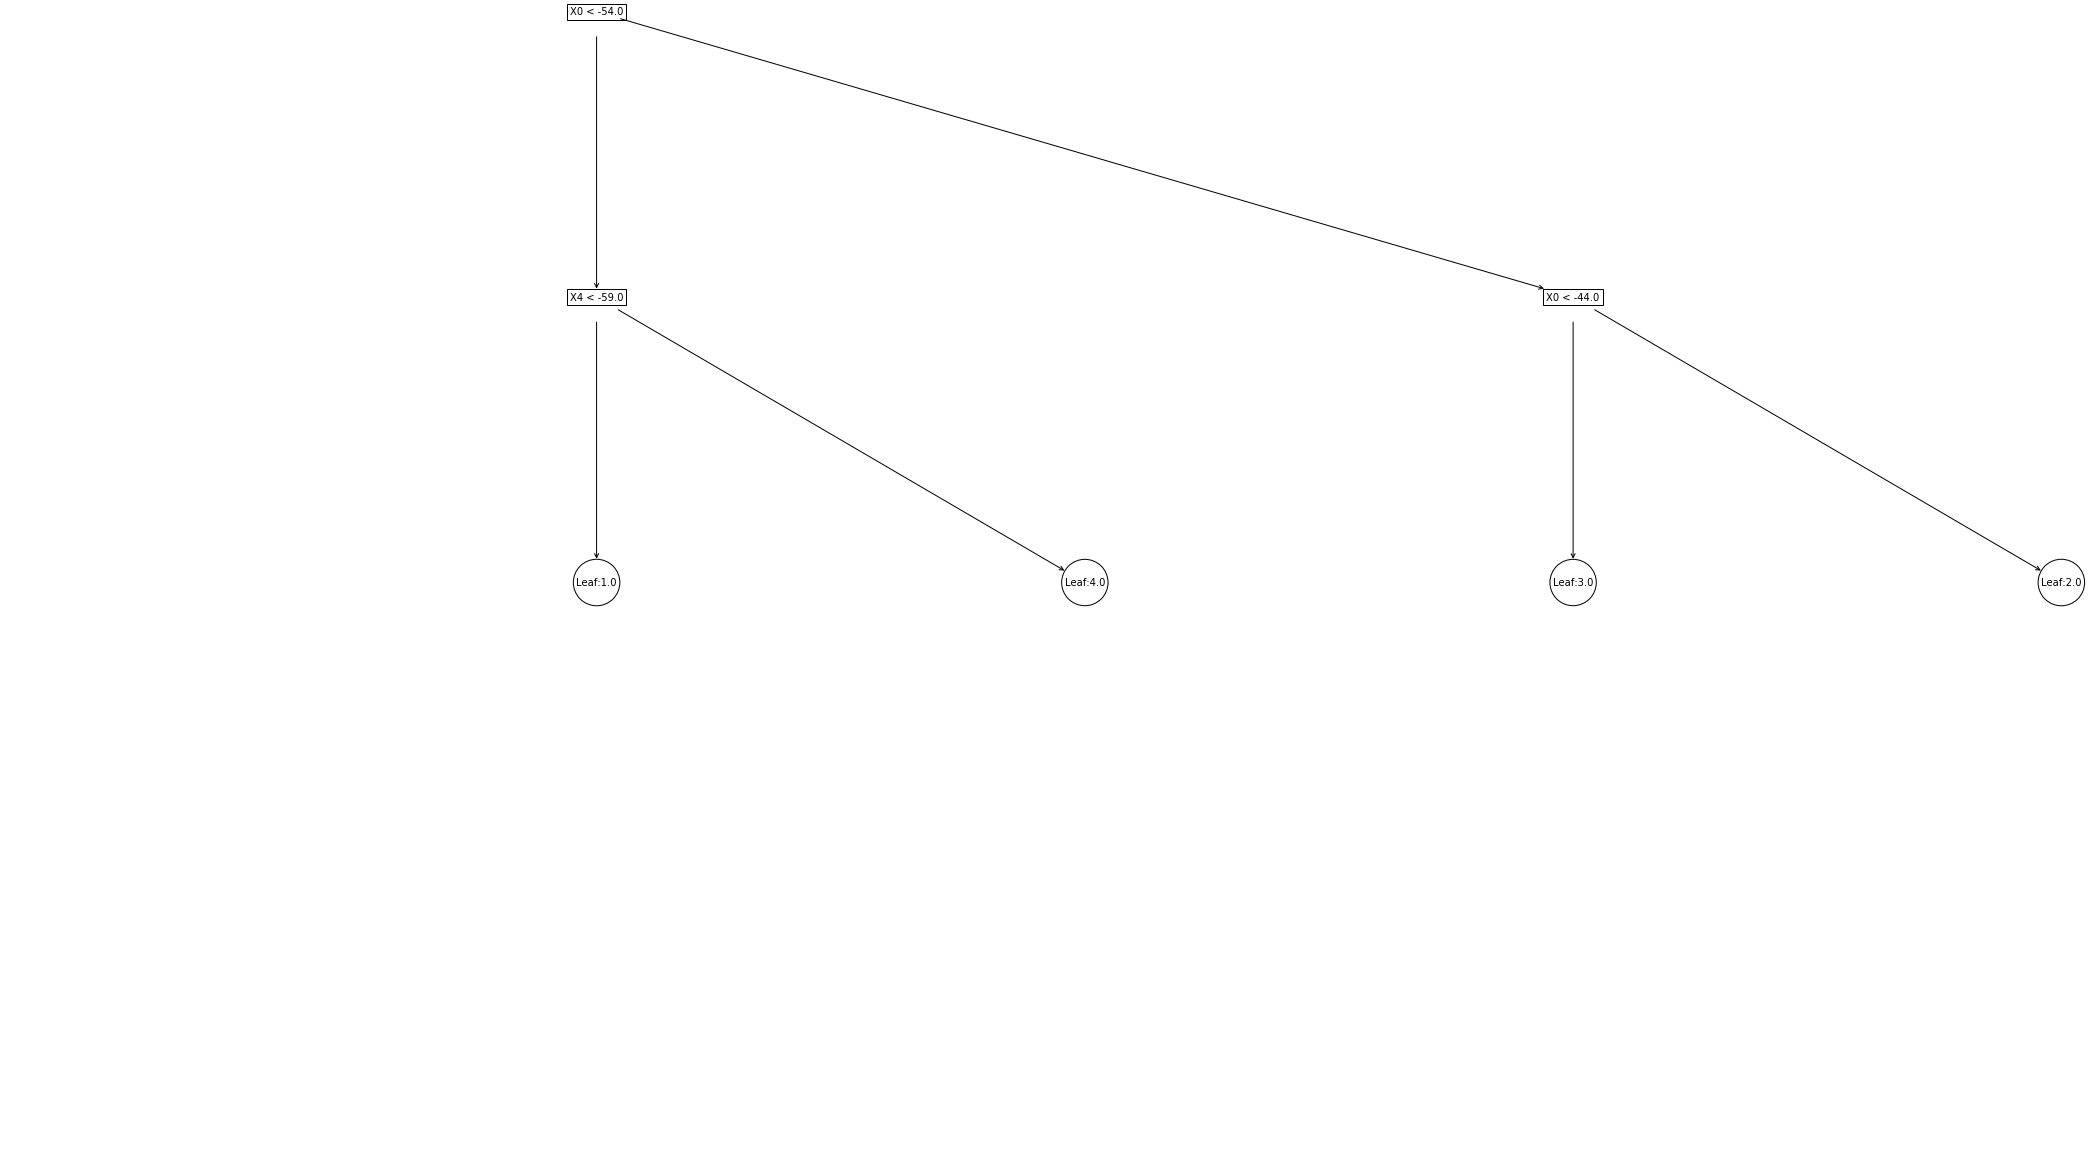

In [37]:
createPlot(tmp_tree)

In [38]:
def post_prune(inTree, train_set, valid_set):
    '''
    This function take a training set and validation set, build a trained tree and apply the reduce-error-pruning rule on the tree level by level
    until there is no more error reduced. 
    Output is the pruned tree.
    '''
    curr_score = accuracy(inTree, valid_set)
    print("pre_prune accuracy:",curr_score)

    while True:
        tmp_tree = prune(inTree,train_set,valid_set)
        tmp_score = accuracy(tmp_tree,valid_set)
        if tmp_score <= curr_score:
            print("post_prune accuracy:",curr_score)
            break
        else:
            curr_score = tmp_score
            inTree = tmp_tree
    return inTree

In [39]:
# Test on clean data
fold_idx = cross_validation_split(data,10)
valid_set = data[fold_idx[0],:]
train_idx = np.delete(np.arange(data.shape[0]), fold_idx[0])
train_set = data[train_idx,:]
inTree = decision_tree_learning(train_set,10)
prune_tree = post_prune(inTree[0],train_set,valid_set)

pre_prune accuracy: 0.975
post_prune accuracy: 0.975


In [40]:
print(prune_tree)

{'attribute': 0, 'value': -55.0, 'left': {'attribute': 4, 'value': -59.5, 'left': {'attribute': 3, 'value': -55.5, 'left': {'attribute': 2, 'value': -51.0, 'left': 1.0, 'right': {'attribute': 0, 'value': -60.5, 'left': 1.0, 'right': 4.0}}, 'right': {'attribute': 1, 'value': -50.5, 'left': 3.0, 'right': {'attribute': 0, 'value': -59.0, 'left': 3.0, 'right': 1.0}}}, 'right': {'attribute': 4, 'value': -56.5, 'left': {'attribute': 3, 'value': -58.5, 'left': 4.0, 'right': 3.0}, 'right': 4.0}}, 'right': {'attribute': 0, 'value': -45.0, 'left': {'attribute': 4, 'value': -70.0, 'left': {'attribute': 3, 'value': -50.0, 'left': 3.0, 'right': {'attribute': 1, 'value': -58.5, 'left': {'attribute': 3, 'value': -44.5, 'left': {'attribute': 0, 'value': -47.5, 'left': 3.0, 'right': 2.0}, 'right': 2.0}, 'right': 2.0}}, 'right': {'attribute': 3, 'value': -39.5, 'left': {'attribute': 4, 'value': -52.5, 'left': {'attribute': 2, 'value': -54.0, 'left': {'attribute': 5, 'value': -77.0, 'left': {'attribute':

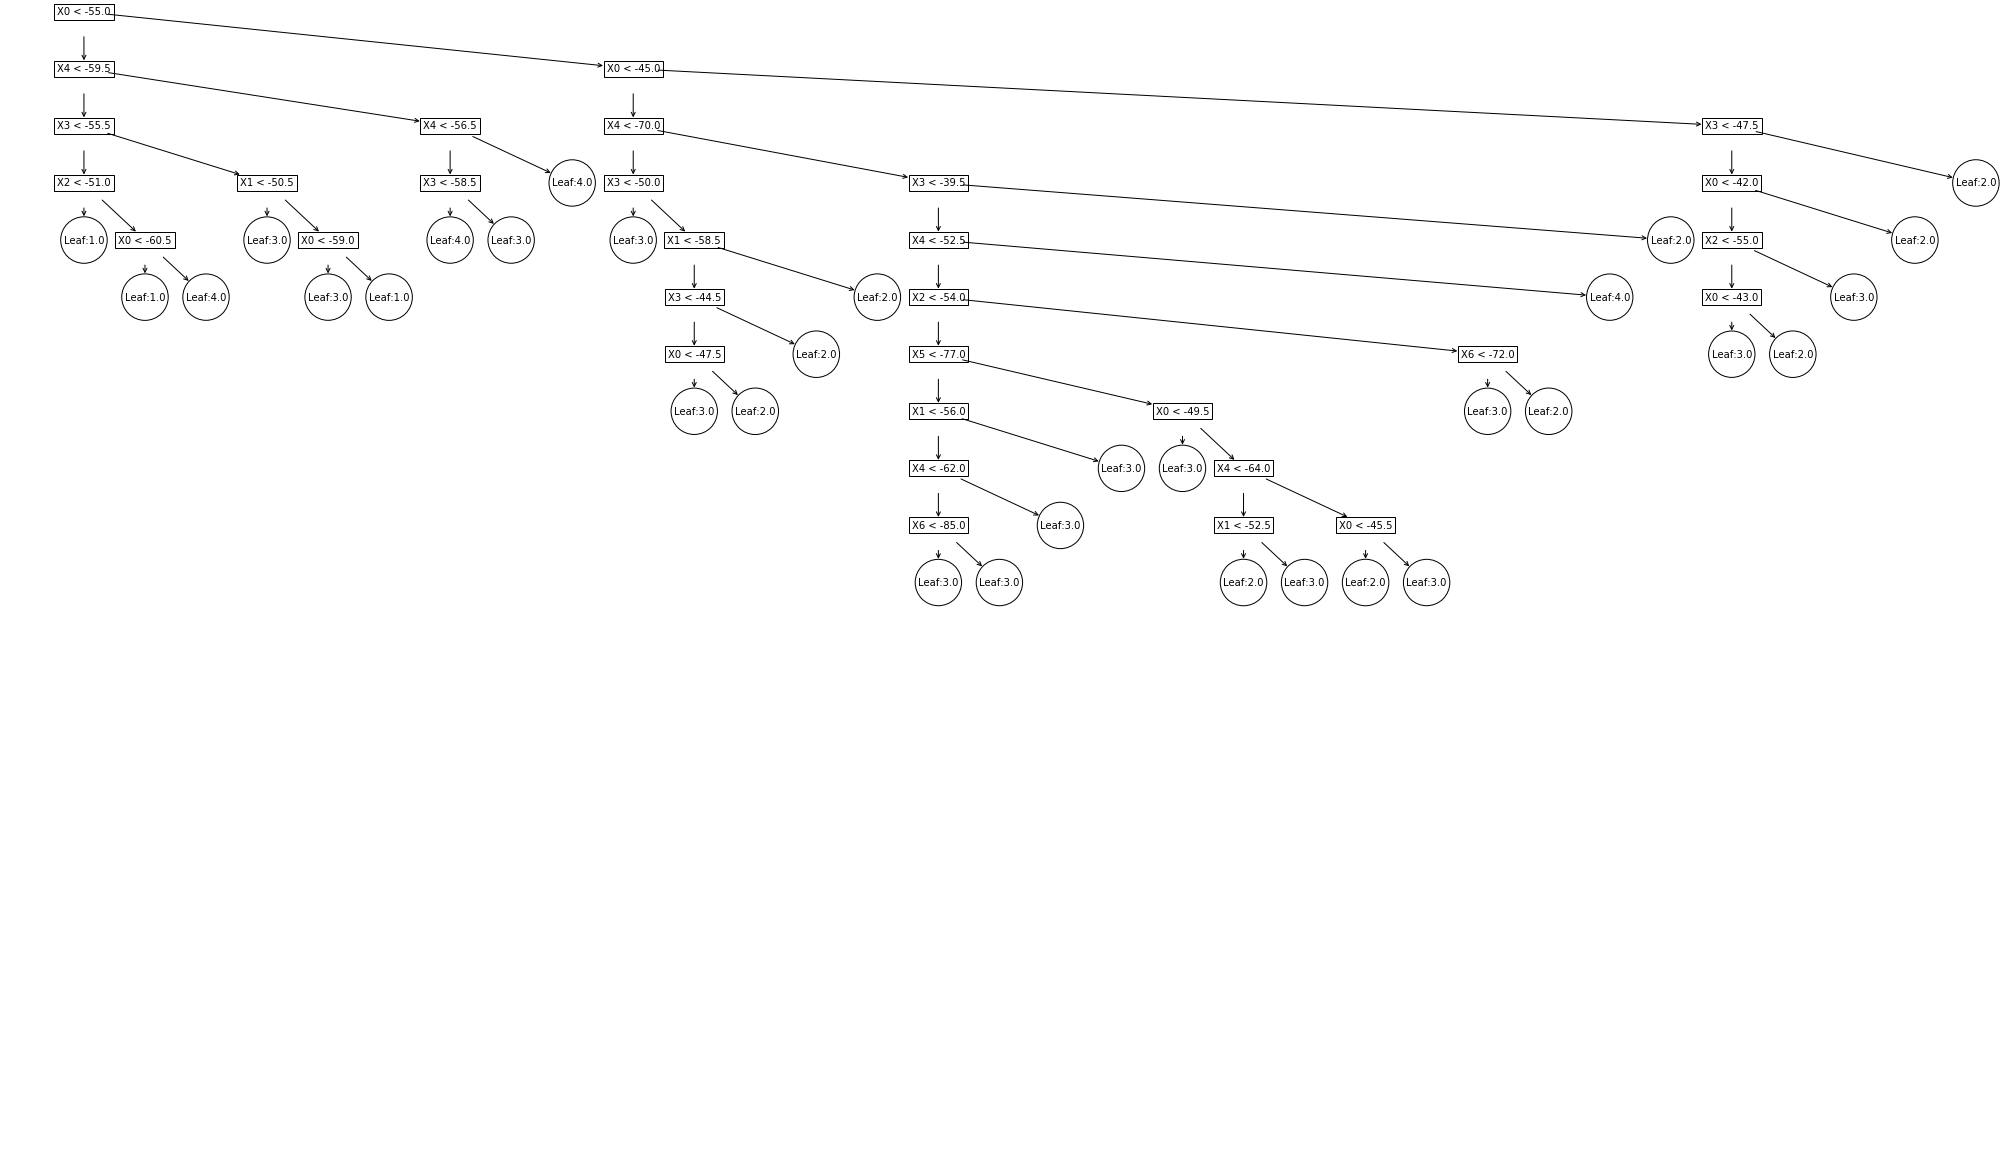

In [41]:
createPlot(prune_tree)

In [42]:
def cross_valid_prune(dataset, n_folds):

    fold_idx = cross_validation_split(dataset, n_folds)
    i = 0
    acc = 0
    n_label = len(np.unique(dataset[:,-1]))
    cm = np.zeros((n_label,n_label))
    for valid_idx in fold_idx:
        i += 1
        print('processing fold',i)
        valid_set = dataset[valid_idx,:]
        train_idx = np.delete(np.arange(dataset.shape[0]), valid_idx)
        train_set = dataset[train_idx,:]
        tree = decision_tree_learning(train_set, 10)
        prune_tree = post_prune(tree[0], train_set,valid_set)
        actual = valid_set[:,-1]
        prediction = get_prediction(prune_tree, valid_set)
        cm += confusion_matrix(actual, prediction)
        acc += accuracy(prune_tree,valid_set)
    acc /= n_folds
    cm /= n_folds
    return acc, cm


In [43]:
acc, cm = cross_valid_prune(data,10)
print(acc)
print(cm)

processing fold 1
pre_prune accuracy: 0.98
post_prune accuracy: 0.98
processing fold 2
pre_prune accuracy: 0.97
post_prune accuracy: 0.975
processing fold 3
pre_prune accuracy: 0.97
post_prune accuracy: 0.97
processing fold 4
pre_prune accuracy: 0.97
post_prune accuracy: 0.975
processing fold 5
pre_prune accuracy: 0.965
post_prune accuracy: 0.97
processing fold 6
pre_prune accuracy: 0.965
post_prune accuracy: 0.965
processing fold 7
pre_prune accuracy: 0.975
post_prune accuracy: 0.975
processing fold 8
pre_prune accuracy: 0.955
post_prune accuracy: 0.955
processing fold 9
pre_prune accuracy: 0.98
post_prune accuracy: 0.98
processing fold 10
pre_prune accuracy: 0.97
post_prune accuracy: 0.97
0.9715
[[49.5  0.   0.3  0.2]
 [ 0.  47.6  2.4  0. ]
 [ 0.3  1.8 47.6  0.3]
 [ 0.3  0.   0.1 49.6]]


In [44]:
def cross_valid_prune(dataset, n_folds):

    fold_idx = cross_validation_split(dataset, n_folds)
    i = 0
    pre_acc = 0
    aft_acc = 0
    n_label = len(np.unique(dataset[:,-1]))
    for valid_idx in fold_idx:
        i += 1
        print('processing fold',i)
        valid_set = dataset[valid_idx,:]
        train_idx = np.delete(np.arange(dataset.shape[0]), valid_idx)
        train_set = dataset[train_idx,:]
        dtree = DecisionTree(train_set[:,:7],train_set[:,-1])
        pre_acc += dtree.accuracy(valid_set[:,:7],valid_set[:,-1])
        dtree.post_prune(valid_set)
        aft_acc += dtree.accuracy(valid_set[:,:7],valid_set[:,-1])
    pre_acc /= n_folds
    aft_acc /= n_folds
    return pre_acc, aft_acc

In [108]:
pre_acc,aft_acc = cross_valid_prune(data_noisy,10)
print(pre_acc,aft_acc)

processing fold 1
pre_prune accuracy: 0.845
post_prune accuracy: 0.855
processing fold 2
pre_prune accuracy: 0.82
post_prune accuracy: 0.82
processing fold 3
pre_prune accuracy: 0.85
post_prune accuracy: 0.855
processing fold 4
pre_prune accuracy: 0.835
post_prune accuracy: 0.835
processing fold 5
pre_prune accuracy: 0.865
post_prune accuracy: 0.865
processing fold 6
pre_prune accuracy: 0.87
post_prune accuracy: 0.875
processing fold 7
pre_prune accuracy: 0.87
post_prune accuracy: 0.88
processing fold 8
pre_prune accuracy: 0.9
post_prune accuracy: 0.92
processing fold 9
pre_prune accuracy: 0.895
post_prune accuracy: 0.895
processing fold 10
pre_prune accuracy: 0.915
post_prune accuracy: 0.915
(0.8714999999999999, array([[44.2,  1. ,  1.6,  2.2],
       [ 2.7, 42.5,  3.2,  1.3],
       [ 2.1,  3.2, 44.4,  1.8],
       [ 2.8,  1.6,  2.2, 43.2]]))
